In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import math

In [2]:
N = 6
max_demos = 1
possible_rewards = np.linspace(0, 1, N)

In [3]:
metrics = {}
metrics["true_evds"] = {num_demos + 1: 0 for num_demos in range(max_demos)}
metrics["pmfs"] = {num_demos + 1: 0 for num_demos in range(max_demos)}
metrics["learned_policies"] = {num_demos + 1: 0 for num_demos in range(max_demos)}
metrics["comparison_grids"] = {num_demos + 1: 0 for num_demos in range(max_demos)}

with open("./debugging.txt") as file:
    lines = file.readlines()
    for line in lines:
        if line.startswith("Environment"):
            curr_metric = "lava_loc"
        elif line.startswith("True reward function"):
            curr_metric = "true_reward"
        elif line.strip() == "True optimal policy":
            curr_metric = "top"
        elif line.startswith("Num demos"):
            curr_demos = float(re.search("Num demos ([.\d]+)", line).group(1))
        elif line.strip() == "EVDs":
            curr_metric = "true_evds"
        elif line.strip() == "PMFs":
            curr_metric = "pmfs"
        elif line.strip() == "Learned policies":
            curr_metric = "learned_policies"
        elif line.strip() == "Comparison grid":
            curr_metric = "comparison_grids"
        elif line.strip().startswith(("0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "[", "(")):
            if curr_metric == "lava_loc":
                lava_loc = eval(line.strip())
            elif curr_metric == "true_reward":
                true_reward = eval(line.strip())
            elif curr_metric == "top":
                true_pi = eval(line.strip())
                true_pi_x = [tp[0] for tp in true_pi]
                true_pi_y = [tp[1] for tp in true_pi]
            else:
                metrics[curr_metric][curr_demos] = eval(line.strip())

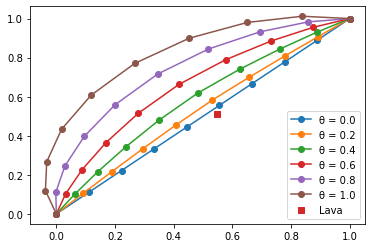

In [4]:
### Debugging policies

possible_policies = [
    [[0.0, 0.0], [0.1111111111111111, 0.1111111111111111], [0.2222222222222222, 0.2222222222222222], [0.3333333333333333, 0.3333333333333333], [0.4444444444444444, 0.4444444444444444], [0.5555555555555556, 0.5555555555555556], [0.6666666666666666, 0.6666666666666666], [0.7777777777777777, 0.7777777777777777], [0.8888888888888888, 0.8888888888888888], [1.0, 1.0]],
    [[0.0, 0.0], [0.0907347265537556, 0.10475051230830741], [0.1889042313641294, 0.21597160293983977], [0.2947487746274911, 0.33342470004706254], [0.40878445512550515, 0.45656031968975347], [0.5320213772846929, 0.5831987125829464], [0.6575210199802148, 0.6999150353604964], [0.7779385083426854, 0.8077731867047135], [0.8922391516910989, 0.907634714937915], [1.0, 1.0]],
    [[0.0, 0.0], [0.06329104725227894, 0.10189374614658428], [0.1419021066093922, 0.2167478621292393], [0.2367358232586527, 0.3432822421427749], [0.3492736000715578, 0.4791888677456004], [0.481526180063776, 0.6181750528005444], [0.6243275755501506, 0.7402775134090325], [0.7608720197316218, 0.8433034608291575], [0.8867947176779258, 0.9294076390824004], [1.0, 1.0]],
    [[0.0, 0.0], [0.032324606668809694, 0.10413612735729035], [0.0881424850313567, 0.22698370460889258], [0.16949107339934302, 0.36557088791665965], [0.27896438545774427, 0.5148155266523704], [0.4184550740720412, 0.6635616603445391], [0.5771534587647079, 0.7894811591304668], [0.7328337399769267, 0.885795601505659], [0.8753237561758223, 0.9551332228907479], [1.0, 1.0]],
    [[0.0, 0.0], [-0.0016189008676757387, 0.11077446978891048], [0.02907879264000743, 0.24499666162842887], [0.09541702694480661, 0.397373949593699], [0.20059333689709086, 0.5594614751236309], [0.34537567827367077, 0.7160254702746675], [0.5182927978162561, 0.8441303195361333], [0.6948791384522476, 0.9324827462587022], [0.8584598072372412, 0.9830308387642103], [1.0, 1.0]],
    [[0.0, 0.0], [-0.03714081030094599, 0.11973146101020543], [-0.03269815040972511, 0.26703350345571036], [0.01805603837274742, 0.4337019547960835], [0.11839922328352927, 0.6076272963453642], [0.26738773850279257, 0.770718660712012], [0.4529637565784952, 0.8995353591863184], [0.6506597653572872, 0.980151659707909], [0.8380336937527416, 1.011925405594347], [1.0, 1.0]]]

for i in range(len(possible_rewards)):
    pp = possible_policies[i]
    ppx = [ppi[0] for ppi in pp]
    ppy = [ppi[1] for ppi in pp]
    plt.plot(ppx, ppy, "-o", label = "θ = {}".format(round(possible_rewards[i], 1)))
plt.scatter(lava_loc[0], lava_loc[1], color = "#D62728", marker = "s", label = "Lava")
plt.legend()
plt.show()

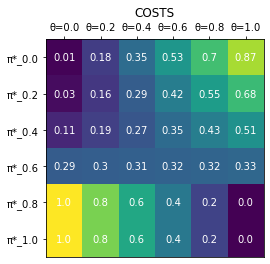

In [5]:
### Debugging values

fig, ax = plt.subplots(1, 1)
possible_rewards = np.linspace(0, 1, N)

comparison_grid = metrics["comparison_grids"][1]
ax.imshow(comparison_grid)
ax.set_xticks(np.arange(len(possible_rewards)))
ax.set_xticklabels(["θ={}".format(round(pr, 2)) for pr in possible_rewards])
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set_yticks(np.arange(len(possible_rewards)))
ax.set_yticklabels(["π*_{}".format(round(pr, 2)) for pr in possible_rewards])
for j in range(len(possible_rewards)):
    for k in range(len(possible_rewards)):
        text = ax.text(k, j, round(comparison_grid[j][k], 2), ha="center", va="center", color="w")
plt.title("COSTS")
plt.show()

### RRT Testing

In [75]:
# Define the coordinates of the single point obstacle
lava_x = 0.5
lava_y = 0.5

def is_collision_free(point1, point2, lava):
    x1, y1 = point1
    x2, y2 = point2
    lava_x, lava_y = lava
    if (x1 == x2):
        return x1 != lava_x
    m = (y2 - y1)/(x2 - x1)
    # if collision free, the lava coordinate does not lie on the line between the two segments
    return lava_y != (m*(lava_x - x1) + y1)
    
# Example usage:
point1 = (0.2, 0.5)
point2 = (0.6, 0.5)
if is_collision_free(point1, point2, (lava_x, lava_y)):
    print("The path from point1 to point2 is collision-free.")
else:
    print("The path from point1 to point2 intersects with the obstacle at (lava_x, lava_y).")

The path from point1 to point2 intersects with the obstacle at (lava_x, lava_y).


In [100]:
# Function to calculate the distance between two points
def distance(point1, point2):
    return math.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

# Function to generate a random waypoint within the angle region and at the specified distance
def generate_random_waypoint(curr_pos, end_pos, num_waypoints, current_index):
    d = distance(curr_pos, end_pos) / (num_waypoints - current_index - 1)
    angle_range_rad = math.radians(180)
    # Define the boundaries of the unit square
    min_x, max_x = 0, 1
    min_y, max_y = 0, 1
    collision_free = False
    while not collision_free:
        angle = np.random.uniform(0, angle_range_rad)
        x = curr_pos[0] + d * math.cos(angle)
        y = curr_pos[1] + d * math.sin(angle)
        # Ensure the generated point is within the unit square
        x = min(max(x, min_x), max_x)
        y = min(max(y, min_y), max_y)
        if is_collision_free(curr_pos, (x, y), (lava_x, lava_y)):
            collision_free = True
    return (x, y)

# RRT Pathfinding function
def rrt_path(start_pos, end_pos, num_waypoints):
    path = [start_pos]
    current_index = 0
    for _ in range(num_waypoints - 2):
        new_waypoint = generate_random_waypoint(path[current_index], end_pos, num_waypoints, current_index)
        path.append(new_waypoint)
        current_index += 1
    # Add the final waypoint at end_pos
    path.append(end_pos)
    return path

# Example usage
start_pos = (0, 0)
end_pos = (1, 1)
num_waypoints = 20
path = rrt_path(start_pos, end_pos, num_waypoints)
print(len(path))
print(path)

20
[(0, 0), (0, 0.059848077726651454), (0, 0.12828470591417185), (0.05429540336773637, 0.1843345541241068), (0, 0.1877360833765938), (0, 0.2504003234235591), (0.05936215054735708, 0.31707123894059835), (0, 0.378827647746389), (0, 0.4374241090981427), (0, 0.5310370555585957), (0, 0.609184365937269), (0, 0.6867039567575176), (0.06231463365056593, 0.801923525843508), (0.12004071505011393, 0.9260700334888756), (0, 0.9448365806352874), (0.07342132657714301, 1), (0, 1), (0.24801498222582574, 1), (0.5085211765536091, 1), (1, 1)]


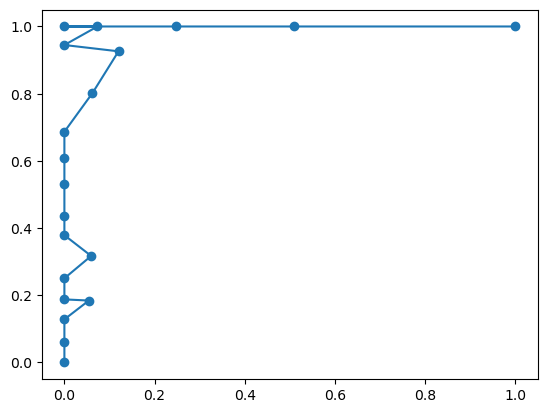

In [101]:
path = np.array(path)
plt.plot(path[:, 0], path[:, 1], "o-")
plt.show()

### Plotting Posterior

In [8]:
!pip install plotly

     |████████████████████████████████| 15.6 MB 7.7 MB/s eta 0:00:01


Rewards
[0.20847072 0.97802861]


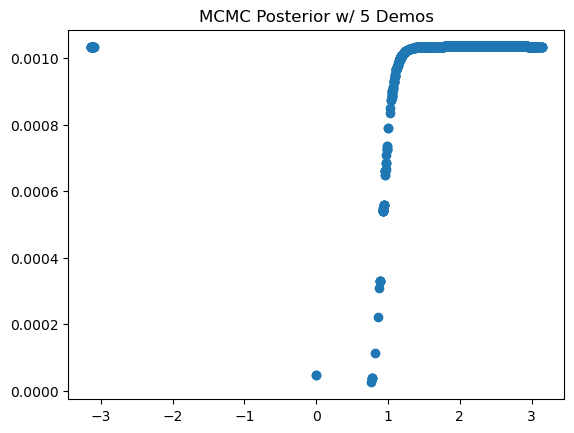

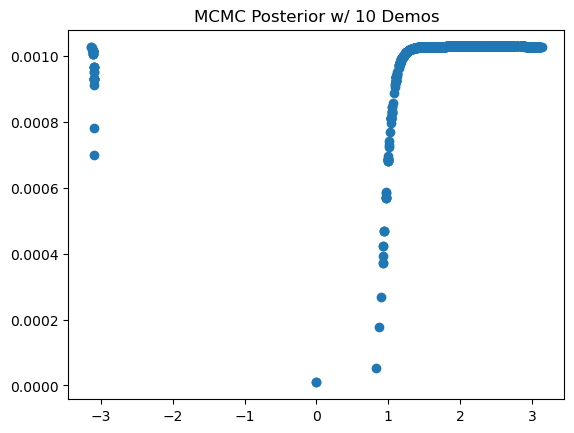

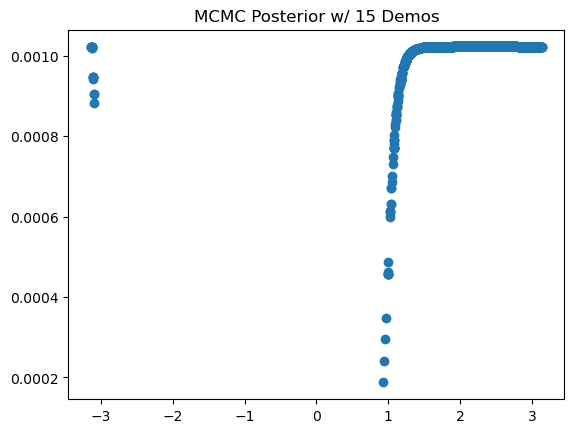

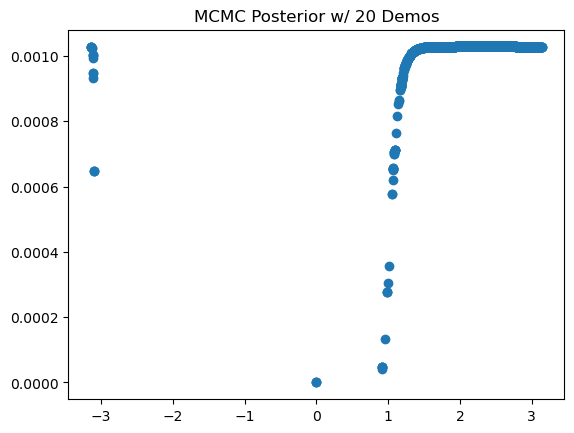

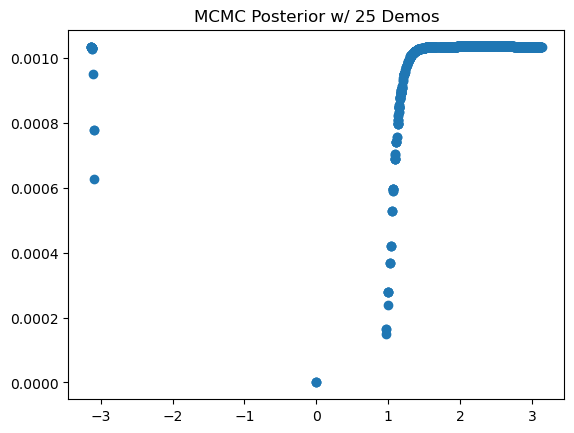

In [2]:
import random
import mdp_utils
import mdp_worlds
import bayesian_irl
from mdp import FeatureMDP
import copy
from scipy.stats import norm
import numpy as np
import math
import sys
import pandas as pd
import json
import matplotlib.pyplot as plt
# import plotly.express as px
# import plotly.io as pio
# pio.renderers.default = "notebook"

rseed = 168
random.seed(rseed)
np.random.seed(rseed)

# Hyperparameters
alpha = 0.95
delta = 0.05
gamma = 0.95
num_rows = 5
num_cols = 5
num_features = 2

# MCMC hyperparameters
beta = 10.0
N = 1000
step_stdev = 0.5
burn_rate = 0.00
skip_rate = 2
adaptive = True

env = mdp_worlds.random_feature_mdp(num_rows, num_cols, num_features, terminals = [random.randint(0, num_rows * num_cols - 1)])
print("Rewards")
print(env.feature_weights)
policy = mdp_utils.get_optimal_policy(env)

demos = []
demo_order = list(range(num_rows * num_cols))
random.shuffle(demo_order)

mcmc_samples = {}
mcmc_samples_lls = {}
# mcmc_filtered_samples = {}
# mcmc_filtered_samples_lls = {}

i = 0
while i < len(demo_order):
    for _ in range(5):
        i += 1
        if i >= 25 or demo_order[i] == env.terminals[0]:
            continue
        D = mdp_utils.generate_optimal_demo(env, demo_order[i])[0]
        demos.append(D)

    birl = bayesian_irl.BIRL(env, demos, beta)
    birl.run_mcmc(N, step_stdev, adaptive = adaptive)
    samples = copy.deepcopy(birl.chain)
    likelihoods = np.exp(birl.likelihoods)
    likelihoods /= np.sum(likelihoods)

    mcmc_samples[i] = samples
    mcmc_samples_lls[i] = likelihoods

#     burn_indx = int(len(samples) * burn_rate)
#     mcmc_filtered_samples[i] = samples[burn_indx::skip_rate]
#     mcmc_filtered_samples_lls[i] = likelihoods[burn_indx::skip_rate]

#     reward_dim_1 = samples[:, 0]
#     reward_dim_2 = samples[:, 1]
#     df = pd.DataFrame({"Reward Dim 1": reward_dim_1,
#                        "Reward Dim 2": reward_dim_2,
#                        "Posterior Probability": likelihoods})
#     fig = px.scatter_3d(df, x = "Reward Dim 1", y = "Reward Dim 2", z = "Posterior Probability",
#                         color = "Posterior Probability", color_continuous_scale = "Viridis")
#     fig.update_layout(scene = dict(zaxis = dict(range = [0, np.max(likelihoods)])))
#     fig.update_layout(title_text = "MCMC Posterior w/ {} Demos".format(i))
#     fig.update_layout(autosize = False, width = 500, height = 500)
#     fig.show("notebook")
    thetas = [np.arctan2(sample[1], sample[0]) for sample in samples]
    plt.scatter(thetas, likelihoods)
    plt.title("MCMC Posterior w/ {} Demos".format(i))
    plt.show()